# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,230,85,35,47,110,55,3,117,57,17,122,136,203,139,89,5,9,180,184
1,664,90,43,72,157,64,8,136,49,18,145,158,279,167,64,4,6,201,209
2,403,96,39,77,160,62,8,140,47,18,150,161,294,124,62,15,3,201,208
3,493,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,439,98,47,109,202,59,11,199,34,23,154,207,586,165,61,1,33,194,208
5,762,90,44,69,152,64,7,135,49,18,145,165,272,162,75,3,2,187,191
6,591,80,36,69,127,56,7,128,53,18,124,147,240,133,70,2,21,183,191
7,487,93,45,81,177,64,7,160,41,20,147,180,383,188,70,11,11,192,199
8,409,86,38,86,175,60,9,170,39,21,134,191,433,138,68,1,28,191,199
9,627,88,44,71,165,70,7,144,46,19,141,167,312,172,71,4,4,188,193


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.147541,93.582878,44.735883,81.672131,167.996357,61.571949,8.555556,168.586521,40.954463,20.557377,147.808743,188.344262,437.956284,174.218579,72.668488,6.411658,12.606557,188.763206,195.499089
std,247.270571,8.263396,6.072059,15.945904,33.026421,8.003011,4.485491,32.691411,7.742652,2.546445,14.506412,30.982039,173.016006,31.712203,7.719497,4.915150,8.797501,6.183510,7.487368
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,149.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,428.000000,92.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,638.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,578.000000,197.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,841.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [10]:
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train_normalized = pd.DataFrame(X_train_normalized)
X_test_normalized = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
X_test_normalized = pd.DataFrame(X_test_normalized)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
num = 20
C = np.linspace(1, 10, num=num)
regularizations = ['l1', 'l2', 'none']
args = np.array(np.meshgrid(C, np.arange(2))).T.reshape((-1, 2))
args = np.append(args, [[1, 2]], axis=0)
best_res = (0, 0, 0)
for lorreg_c, reg in args:
    model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=lorreg_c, penalty=regularizations[int(reg)])
    cv_results = cross_validate(model, X_train_normalized, y_train, scoring='accuracy')
    score = cv_results['test_score'].mean()
    if score > best_res[0]:
        best_res = (score, lorreg_c, regularizations[int(reg)])
lorreg_c = best_res[1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be remov

accuracy: 0.8114478114478114 f1: 0.8110785048285049
coeff: 1.0
regularization: none


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

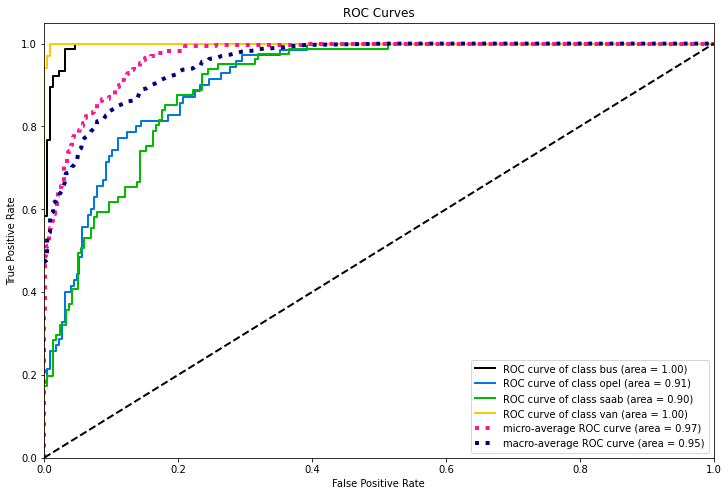

In [8]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500,
                           C=best_res[1], penalty='l1')
model.fit(X_train_normalized, y_train)
pred = model.predict(X_test_normalized)
print('accuracy:', accuracy_score(pred, y_test), 'f1:', f1_score(pred, y_test, average='macro'))
print('coeff:', best_res[1])
print('regularization:', best_res[2])
plot_roc(y_test, model.predict_proba(X_test_normalized), figsize=(12, 8))

In [9]:
print(f"the best accuracy score is {best_res[0]:.2f} reached on {best_res[2]}-regularization")

the best accuracy score is 0.80 reached on none-regularization


In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [11]:
lambd = np.linalg.svd(X_train_normalized, compute_uv=False)
lambd = lambd.cumsum() / lambd.sum()

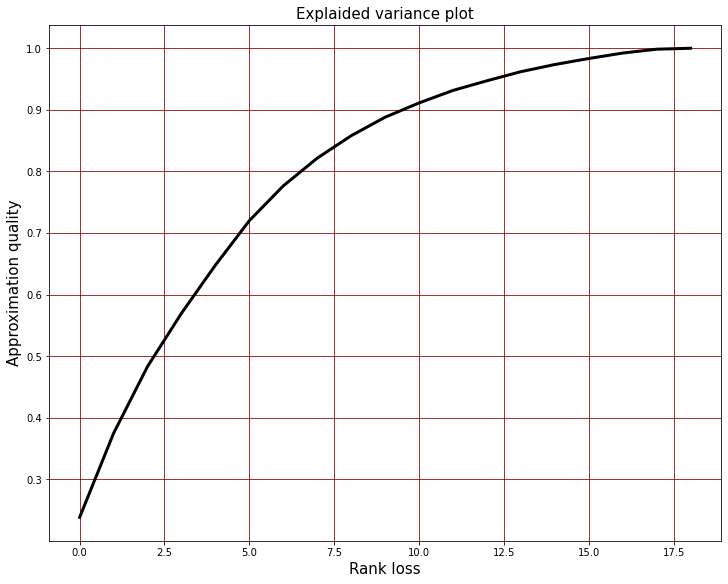

In [12]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(lambd, 'black', linewidth=3)
#fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Rank loss', fontsize=15)
fig_ax_1.set_ylabel('Approximation quality', fontsize=15)
fig_ax_1.set_title('Explaided variance plot', fontsize=15)
fig_ax_1.grid(color='darkred')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
num = 20
C = np.linspace(1, 10, num=num)
regularizations = ['l1', 'l2', 'none']
args = np.array(np.meshgrid(C, np.arange(2))).T.reshape((-1, 2))
args = np.append(args, [[1, 2]], axis=0)
best_res_pca = (0, 0, 0)
for lorreg_c, reg in args:
    model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=lorreg_c, penalty=regularizations[int(reg)])
    cv_results = cross_validate(model, X_train_pca, y_train, scoring='accuracy')
    score = cv_results['test_score'].mean()
    if score > best_res_pca[0]:
        best_res_pca = (score, lorreg_c, regularizations[int(reg)])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be remov

accuracy: 0.7171717171717171 f1: 0.7131319839763862
coeff: 1.0
regularization: l2


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

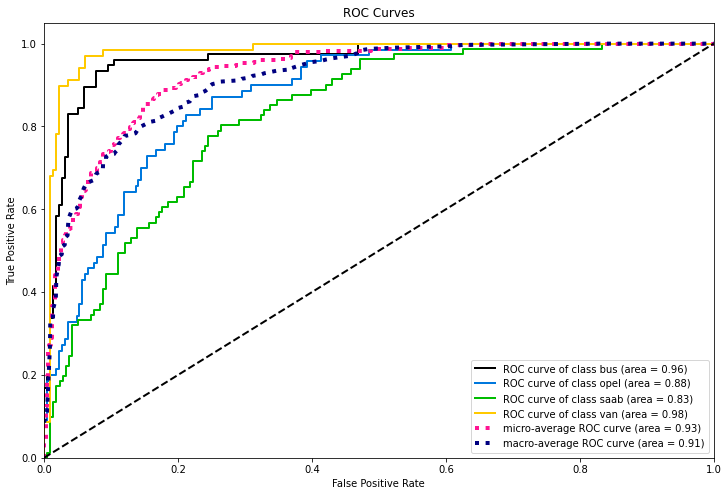

In [15]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=best_res_pca[1],
                           penalty=best_res_pca[2])
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print('accuracy:', accuracy_score(pred, y_test), 'f1:', f1_score(pred, y_test, average='macro'))
print('coeff:', best_res_pca[1])
print('regularization:', best_res_pca[2])

plot_roc(y_test, model.predict_proba(X_test_pca), figsize=(12, 8))

In [16]:
print(f"the best accuracy score is {best_res_pca[0]:.2f} reached on {best_res_pca[2]}-regularization")

the best accuracy score is 0.71 reached on l2-regularization


#### So we decreased an accuracy level, but compressed the data

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

depths_num = 80

best_res = (0, 1)
for depth in np.arange(1, depths_num + 1):
    model = DecisionTreeClassifier(max_depth = depth, random_state=42)
    cv_results = cross_validate(model, X_train, y_train, scoring='accuracy')
    score = cv_results['test_score'].mean()
    if score > best_res[0]:
        best_res = (score, depth)
best_depth = best_res[1]
model = DecisionTreeClassifier(max_depth = best_depth, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(f'best depth makes up {best_depth}, accuracy is {accuracy_score(pred, y_test):.2f}, and f1_score is {f1_score(pred, y_test, average="macro"):.2f}')

best depth makes up 5, accuracy is 0.70, and f1_score is 0.69


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [18]:
N_min = 2
N_max = 100
ens_ids = np.random.choice(np.arange(X_train.shape[0]), (N_max, X_train.shape[0]))
le = LabelEncoder()
le.fit(y_test)

LabelEncoder()

In [19]:
preds = []
for i in range(N_max):
    model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=lorreg_c, penalty='l1')
    model.fit(X_train[ens_ids[i]], y_train[ens_ids[i]])
    tmp = le.transform(model.classes_)
    pred = np.zeros((X_test.shape[0], 4))[:, tmp] = model.predict_proba(X_test)
    preds.append(pred)
preds = np.array(preds).cumsum(axis=0).argmax(axis=2)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

In [20]:
accuracy_plt = []
f1_plt = []
for i in range(N_min - 1, N_max):
    accuracy_plt.append(accuracy_score(le.inverse_transform(preds[i]), y_test))
    f1_plt.append(f1_score(le.inverse_transform(preds[i]), y_test, average='macro'))

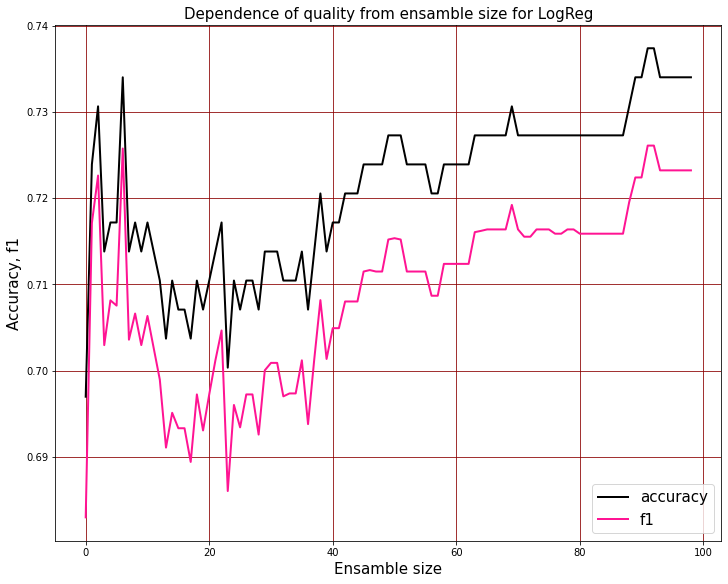

In [21]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_plt, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_plt, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Ensamble size', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of quality from ensamble size for LogReg', fontsize=15)
fig_ax_1.grid(color='darkred')

#### It is obvious that for a logistic regression this procedure does not improve the quality level.


In [22]:
preds = []
for i in range(N_max):
    model = DecisionTreeClassifier(max_depth = depth, random_state=42)
    model.fit(X_train[ens_ids[i]], y_train[ens_ids[i]])
    tmp = le.transform(model.classes_)
    pred = np.zeros((X_test.shape[0], 4))[:, tmp] = model.predict_proba(X_test)
    preds.append(pred)
preds = np.array(preds).cumsum(axis=0).argmax(axis=2)


In [23]:
accuracy_plt = []
f1_plt = []
for i in range(N_min - 1, N_max):
    accuracy_plt.append(accuracy_score(le.inverse_transform(preds[i]), y_test))
    f1_plt.append(f1_score(le.inverse_transform(preds[i]), y_test, average='macro'))

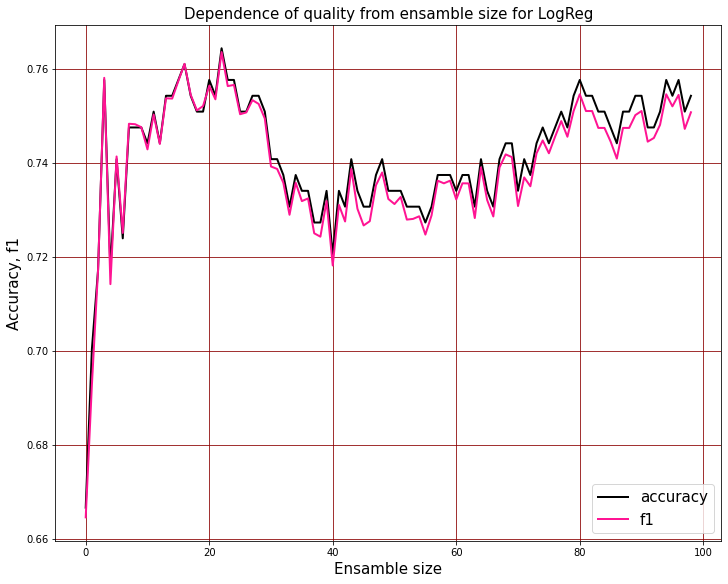

In [24]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_plt, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_plt, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Ensamble size', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of quality from ensamble size for LogReg', fontsize=15)
fig_ax_1.grid(color='darkred')

#### However, for the forest this procedure makes the level of quality grow.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [25]:
from sklearn.ensemble import RandomForestClassifier

accuracy_forest_scores = []
f1_forest_scores = []
num_trees_max = 100
for n_estim in range(1, num_trees_max + 1):
    forest = RandomForestClassifier(n_estimators=n_estim, random_state=42)
    forest.fit(X_train, y_train)
    pred = forest.predict(X_test)
    accuracy_forest_scores.append(accuracy_score(pred, y_test))
    f1_forest_scores.append(f1_score(pred, y_test, average='macro'))

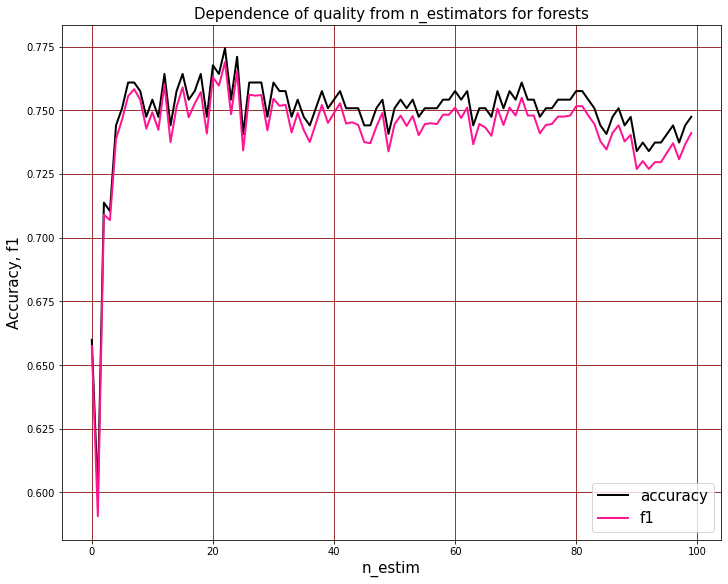

In [26]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_forest_scores, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_forest_scores, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('n_estim', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of quality from n_estimators for forests', fontsize=15)
fig_ax_1.grid(color='darkred')

Overall, what stands out from the line graph below is that in the very beginning, the bigger estimated number of estimators is, the better result will be. But from a certain point (approx. 20) the increase becomes not very necessary, because the accuracy gain is not great.
For logistic regression the ensemble is useless, for trees it is useful, the graphs of the ensemble on trees and for random forest are similar because in essence random forest is a slight improvement of the ensemble on trees. In this case it is better to choose n_estimators=20 because of speed considerations.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [27]:
N = (X_train.shape[0] + 9) // 10
accuracy_scores = []
f1_scores = []
for n in range(1, N + 1):
    logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=lorreg_c, penalty='l1', random_state=42)
    logreg.fit(X_train[:10 * n], y_train[:10 * n])
    pred = logreg.predict(X_test)
    accuracy_scores.append(accuracy_score(pred, y_test))
    f1_scores.append(f1_score(pred, y_test, average='macro'))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

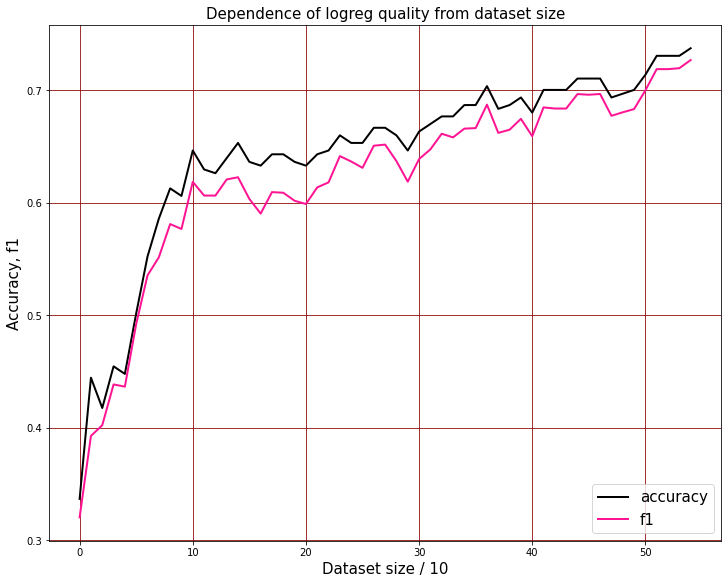

In [28]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_scores, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_scores, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Dataset size / 10', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of logreg quality from dataset size', fontsize=15)
fig_ax_1.grid(color='darkred')

In [29]:
accuracy_scores = []
f1_scores = []
for n in range(1, N + 1):
    tree = DecisionTreeClassifier(max_depth = best_depth, random_state=42)
    tree.fit(X_train[:10 * n], y_train[:10 * n])
    pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(pred, y_test))
    f1_scores.append(f1_score(pred, y_test, average='macro'))

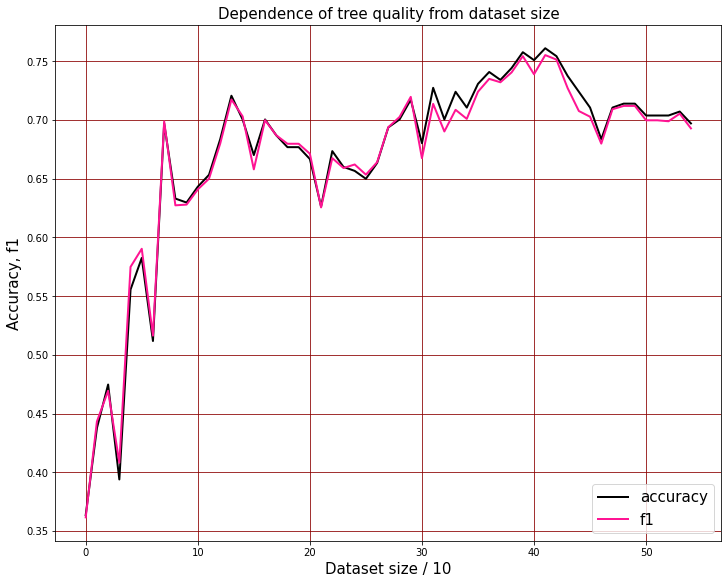

In [30]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_scores, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_scores, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Dataset size / 10', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of tree quality from dataset size', fontsize=15)
fig_ax_1.grid(color='darkred')

In [31]:
accuracy_scores = []
f1_scores = []
for n in range(1, N + 1):
    forest = RandomForestClassifier(n_estimators=20, random_state=42)
    forest.fit(X_train[:10 * n], y_train[:10 * n])
    pred = forest.predict(X_test)
    accuracy_scores.append(accuracy_score(pred, y_test))
    f1_scores.append(f1_score(pred, y_test, average='macro'))

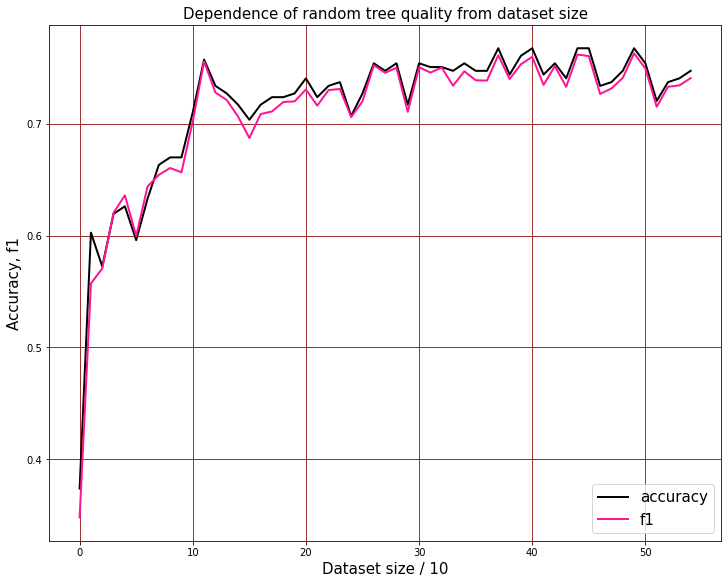

In [32]:
fg = plt.figure(figsize=(10, 8), constrained_layout=True, facecolor = "white")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")
fig_ax_1.plot(accuracy_scores, 'black', label = 'accuracy', linewidth=2)
fig_ax_1.plot(f1_scores, 'deeppink', label = 'f1', linewidth=2)
fig_ax_1.legend(loc="lower right", fontsize=15)
fig_ax_1.set_xlabel('Dataset size / 10', fontsize=15)
fig_ax_1.set_ylabel('Accuracy, f1', fontsize=15)
fig_ax_1.set_title('Dependence of random tree quality from dataset size', fontsize=15)
fig_ax_1.grid(color='darkred')

#### As it was expected, with the increase of the data, the quality of a model improves.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.